In [7]:
import os
import sys
sys.path.append(os.getcwd())
sys.path.append('\\'.join(os.getcwd().split('\\')[:-3]))
import time

import numpy as np
import matplotlib.pyplot as plt
import pickle

from restools.standardised_programs import StandardisedProgramEdge, MoehlisModelIntegrator, EsnIntegrator
from restools.timeintegration import TimeIntegrationLowDimensional
from studies.none2021_moehlis_transition.extensions import LocalPythonTimeIntegrationGraph,\
    RemotePythonTimeIntegrationGraph
from comsdk.communication import LocalCommunication, SshCommunication
from comsdk.research import Research, CreateTaskGraph
from comsdk.graph import Graph, State, Func
from comsdk.edge import Edge, dummy_predicate, make_dump

In [23]:
local_comm = LocalCommunication.create_from_config()
res = Research.open('RC_MOEHLIS')
ics = []
source_task = 42

for ic_i in range(1, 101):
    ti = TimeIntegrationLowDimensional(res.get_task_path(source_task), ic_i)
    ics.append(ti.timeseries[:10].tolist())

n_ics = len(ics)
re = 275

#esn_name = f'esn_max_len_unuse_bias'
#esn_name = f'esn_max_len'
#esn_name = f'esn_min_len'
#esn_name = f'esn_1954_len'
#esn_name = f'esn_1954_len_unuse_bias'

#esn_name = f'esn_1954_len_unuse_bias_additive_noise_when_forecasting'

#esn_name = f'esn_1954_len_unuse_bias_reg-noise'
#esn_name = f'esn_1954_len_unuse_bias_reg-None'
#esn_name = f'esn_1954_len_use_bias_reg-noise'
#esn_name = f'esn_1954_len_use_bias_reg-None'


#esn_name = f'esn_1954_len_unuse_bias_reg-noise01'
esn_name = f'esn_1954_len_use_bias_reg-noise01'


#esn_name = 'esn_trained_wo_lam_event'



l_x = 1.75
l_z = 1.2
#n_steps = 20000
n_steps = 2000
#n_steps = 2000
#n_steps = 200

Loaded research at C:\Users\ovann\Documents\Researches\2021-04-30-predicting-transition-to-turbulence-using-esn
Number of tasks in the current research: 58


In [24]:
data = {
        'res': res,
#        'esn_path': os.path.join(res.local_research_path, esn_name),
#        'esn_path': os.path.join(res.get_task_path(42), esn_name),
        'esn_path': r'C:\Users\ovann\Jupyter Notebook\7sem\VKR\\' + esn_name,
#        'esn_path': os.path.join(res.remote_research_path, esn_name),
        'dt_as_defined_by_esn': 1,
        'n_steps': n_steps,
        'final_time': n_steps,
        're': re,
        'l_x': l_x,
        'l_z': l_z,
        'initial_conditions': ics,
        'input_filename': 'inputs.json',
        'output_filenames': [str(i) for i in range(1, n_ics + 1)],
        'description': f'ESN trajectories for perturbation dynamics for lifetime distribution at Re = {re}. Initial conditions are taken from task '
                       f'{source_task}. '
                       f'Noise is disabled while predicting'
    }

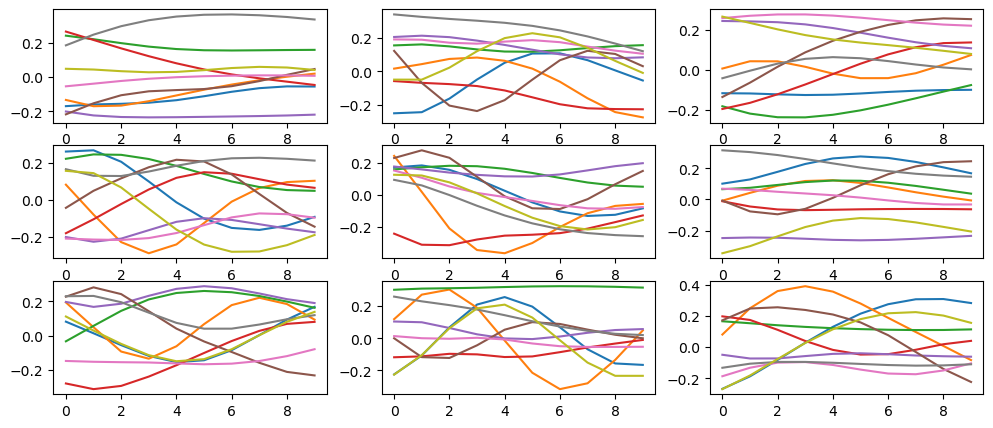

In [25]:
plt.figure(figsize=(12,5))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.plot(np.array(ics)[i, :, :]);

In [26]:
graph = LocalPythonTimeIntegrationGraph(
    res, 
    local_comm, 
    EsnIntegrator(input_filename_key='input_filename', nohup=True), 
    input_filename=data['input_filename'],
    task_prefix=f'ESNPredictionNoNoise'
)

In [27]:
okay = graph.run(data)

STATE READY_FOR_TASK_CREATION
	just entered, implicit_parallelization_info: None
	required input: 1, active: 1, looped: 0
STATE TASK_CREATED
	just entered, implicit_parallelization_info: None
	required input: 1, active: 1, looped: 0
STATE READY_FOR_PYTHON_TIMEINTEGRATION
	just entered, implicit_parallelization_info: None
	required input: 1, active: 1, looped: 0
C:\Users\ovann\Desktop\VKR\Reps\esn-studies\studies\none2022_why_do_esns_work\programs time_integrate_esn.py
STATE PYTHON_TIMEINTEGRATION_FINISHED
	just entered, implicit_parallelization_info: None
	required input: 1, active: 1, looped: 0
